In [4]:
import os
from cadtoolkit.pc2g import CoronaryGraph, _read_centerlines_txt


In [5]:
from cadtoolkit.cfg import Config; Config.pc2g

{'xyz': [1, 2, 3],
 'id': 0,
 'sep': ' ',
 'presmooth_iterations': 100,
 'presmooth_passband': 0.1,
 'group': True,
 'merge': True,
 'convert_cell_data': True,
 'postsmooth_iterations': 100,
 'postsmooth_passband': 0.1}

In [20]:
path = "small_data" # change this path

files = os.listdir(path)
if not os.path.exists('graphs'):
    os.makedirs('graphs')

In [21]:
print(files)
print(files[1])
f= files[1]

['AP1130.txt', 'AP1131.txt', 'AP1132.txt', 'AP1136.txt', 'AP1137.txt', 'AP1119.txt']
AP1131.txt


In [23]:
for f in files: # uncomment this when sure its working...

    g = CoronaryGraph() # creates empty graph 'g'
    updated_g = g.from_txt(os.path.join(path, f))

    # Save the CoronaryGraph() object
    f_without_ext = os.path.splitext(f)[0] # remove .txt extension
    updated_g.sg=None
    updated_g.save(f"graphs/{f_without_ext}")

{'ids': array([0, 0, 0, ..., 8, 8, 8], dtype=uint8)}
{'ids': array([0, 0, 0, ..., 8, 8, 8], dtype=uint8), 'Radius': array([1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5], dtype=float32)}
converting points
converting point data
converting cell data
Writing VTK XML surface file.
{'ids': array([0, 0, 0, ..., 3, 3, 3], dtype=uint8)}
{'ids': array([0, 0, 0, ..., 3, 3, 3], dtype=uint8), 'Radius': array([1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5], dtype=float32)}
converting points
converting point data
converting cell data
Writing VTK XML surface file.
{'ids': array([0, 0, 0, ..., 7, 7, 7], dtype=uint8)}
{'ids': array([0, 0, 0, ..., 7, 7, 7], dtype=uint8), 'Radius': array([1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5], dtype=float32)}
converting points
converting point data
converting cell data
Writing VTK XML surface file.
{'ids': array([0, 0, 0, ..., 7, 7, 7], dtype=uint8)}
{'ids': array([0, 0, 0, ..., 7, 7, 7], dtype=uint8), 'Radius': array([1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5], dtype=float32)}
converting points
convertin

In [24]:
print(f"Start: {updated_g.startpts()}")
print(f"Bifs: {updated_g.bifurcations()}")
# print(f"Inner: {points.inner_points()}")
print(f"End: {updated_g.endpoints()}")


Start: {0, 4033}
Bifs: {10306, 10307, 10308, 10309, 10310}
End: {4032, 10305, 7077, 8335, 9912, 6013, 9214}


In [10]:
# for idx, val in updated_g.nodes.items():
#     print(idx, val)

In [25]:
# Showing info for random points
print(updated_g.nodes[0])
print(updated_g.nodes[2791])
print(updated_g.nodes[8368])
print(updated_g.nodes[5000])
print(updated_g.nodes[4995])

{'ids': 0, 'Radius': 1.5, 'TCoords': array([0., 0.], dtype=float32), 'CenterlineIds': 0, 'TractIds': 0, 'Blanking': 0, 'GroupIds': 0, 'loc': array([ 13.447166, -23.152866, -85.1981  ], dtype=float32)}
{'ids': 0, 'Radius': 1.5, 'TCoords': array([0.34442684, 0.        ], dtype=float32), 'CenterlineIds': 0, 'TractIds': 4, 'Blanking': 0, 'GroupIds': 4, 'loc': array([  28.509182 ,    1.8100071, -151.44302  ], dtype=float32)}
{'ids': 4, 'Radius': 1.5, 'TCoords': array([0.03644647, 0.        ], dtype=float32), 'CenterlineIds': 4, 'TractIds': 6, 'Blanking': 0, 'GroupIds': 14, 'loc': array([ 56.787674, -20.034348, -81.409615], dtype=float32)}
{'ids': 1, 'Radius': 1.5, 'TCoords': array([0.10035524, 0.        ], dtype=float32), 'CenterlineIds': 1, 'TractIds': 6, 'Blanking': 0, 'GroupIds': 10, 'loc': array([ 53.332737, -24.652634, -83.560875], dtype=float32)}
{'ids': 1, 'Radius': 1.5, 'TCoords': array([0.09591474, 0.        ], dtype=float32), 'CenterlineIds': 1, 'TractIds': 6, 'Blanking': 0, 'Grou

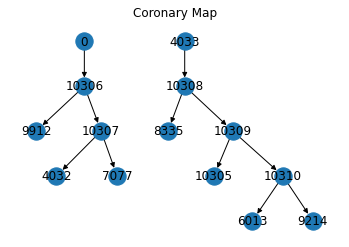

In [26]:
# Plot graph 

import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

skeleton_graph = updated_g.collapse_intermediates()
plt.title('Coronary Map')
pos=graphviz_layout(skeleton_graph, prog='dot')
nx.draw(skeleton_graph, pos, with_labels=True, arrows=True) # good
plt.savefig('nx_test.png')

In [ ]:
# bad way of plotting graph with bifurcations - no top to bottom order

# import networkx as nx
# from networkx.readwrite import json_graph
# skeleton_graph = updated_g.collapse_intermediates()
# nx.draw(skeleton_graph, with_labels=True) 

In [27]:
# Attempt to create Graph dataset
import torch
from torch_geometric.data import Data, DataLoader

print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())

1.6.0
10.2
True


In [48]:
from torch_geometric.utils import from_networkx
raw_dataset = []

files = os.listdir("graphs/")
for f in files:
    
    if f == ".ipynb_checkpoints": continue
    
    a = CoronaryGraph() # another empty graph
    loadedGraph = a.load(f"graphs/{f}")
    skeleton_graph = loadedGraph.collapse_intermediates()
    data = from_networkx(skeleton_graph)
    data.y = data.ids
    raw_dataset.append(data)
    print(f"{f} \n {data}")


AP1130 
 Data(Blanking=[16], CenterlineIds=[16], GroupIds=[16], Radius=[16], TCoords=[16, 2], TractIds=[16], edge_index=[2, 14], ids=[16], loc=[16, 3], y=[16])
AP1131 
 Data(Blanking=[8], CenterlineIds=[8], GroupIds=[8], Radius=[8], TCoords=[8, 2], TractIds=[8], edge_index=[2, 6], ids=[8], loc=[8, 3], y=[8])
AP1132 
 Data(Blanking=[16], CenterlineIds=[16], GroupIds=[16], Radius=[16], TCoords=[16, 2], TractIds=[16], edge_index=[2, 14], ids=[16], loc=[16, 3], y=[16])
AP1136 
 Data(Blanking=[16], CenterlineIds=[16], GroupIds=[16], Radius=[16], TCoords=[16, 2], TractIds=[16], edge_index=[2, 14], ids=[16], loc=[16, 3], y=[16])
AP1137 
 Data(Blanking=[14], CenterlineIds=[14], GroupIds=[14], Radius=[14], TCoords=[14, 2], TractIds=[14], edge_index=[2, 12], ids=[14], loc=[14, 3], y=[14])
AP1119 
 Data(Blanking=[14], CenterlineIds=[14], GroupIds=[14], Radius=[14], TCoords=[14, 2], TractIds=[14], edge_index=[2, 12], ids=[14], loc=[14, 3], y=[14])


In [49]:
# prints info for last file in array
print(files[-2])
print(data.loc)
print(data.ids)
# print(data.CenterlineIds)
# print(data.TractIds)
    
# print(raw_dataset[3].y)
# print(data.edge_index)

AP1119
tensor([[  13.4472,  -23.1529,  -85.1981],
        [  63.7865,  -38.8657, -154.0710],
        [  19.9578,    7.4953,  -75.2229],
        [  66.1562,  -45.6643, -119.3910],
        [  39.8805,   28.2729, -133.5790],
        [  64.9646,   27.9968, -105.1740],
        [  79.3178,  -28.6302, -110.9610],
        [  -5.0009,  -47.2158, -104.0470],
        [  59.7998,  -10.9884,  -81.0597],
        [  -8.9116,  -28.3701,  -92.2535],
        [   3.5043,    9.2249, -145.0363],
        [  28.9190,    5.9320,  -75.2387],
        [  43.5250,   -5.7335,  -74.3049],
        [  54.8944,  -19.7976,  -79.5820]])
tensor([0, 0, 1, 1, 2, 3, 4, 5, 6, 0, 0, 1, 1, 1], dtype=torch.int32)


In [50]:
# print(data.GroupIds)
# print(data.CenterlineIds)
# print(data.edge_index)

from torch_geometric.data import InMemoryDataset


class MyOwnDataset(InMemoryDataset):
    
    num_classes = 10
    num_node_features = 3
    def __init__(self, root, transform=None, pre_transform=None):
        super(MyOwnDataset,self).__init__(root, transform, pre_transform)
        
        self.data, self.slices = torch.load(self.processed_paths[0])
        data.y = data.ids # target labels
        data.x = data.loc
#         print(data.x)

    @property
    def raw_file_names(self):
        return ["graphs"]

    @property
    def processed_file_names(self):
        return ['processed']

    def download(self):
        # Download to `self.raw_dir`.
#         torch.save((data, slices), self.processed_paths[0])
        print("hello")

    def process(self):
        # Read data into huge `Data` list.
        data_list = raw_dataset

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])

dataset = MyOwnDataset("raw")


# loader = DataLoader(data_list, batch_size=2)

# for x in loader:
#     print(x)

# print(dataset.num_classes)
# print(dataset.num_node_features)
# print(dataset[0])

hello
Processing...
Done!


In [51]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [52]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch.nn as nn

class GraphCNN(nn.Module):
    def __init__(self):
        super(GraphCNN, self).__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.loc, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        
        x = self.conv2(x, edge_index)
        return x


class TreeLabNet(torch.nn.Module):
    def __init__(self, hidden_dim, emb_dim=100, num_linear=1):
        super().__init__()
        
        self.cnn=GraphCNN()
        
        # hidden and cell states for LSTM
#         self.h = torch.randn(1, 1, hidden_dim).to(device) 
#         self.c = torch.randn(1, 1, hidden_dim).to(device)
        self.lstm=nn.LSTM(
            input_size=emb_dim, 
            hidden_size=hidden_dim, 
            num_layers=1)    
        
        # fc layers
        self.fc1 = nn.Linear(128, 64) #flattening.
        self.fc2 = nn.Linear(64, dataset.num_classes) # 64 in, 9 out bc we're doing 9 classes 

    def forward(self, x): # used to be data
        
        x = self.cnn(x)
        
        x = x.view(-1, 1, x.shape[1])
#         print(x.shape)
        lstm_out, (h,c) = self.lstm(x)
#         print(lstm_out[0:3])
#         dim = .shape[1]*x.shape[2]
#         lstm_out = lstm_out.view(-1, dim) 
# #         print(x.shape)
        lstm_out = self.fc1(lstm_out)
        lstm_out = F.relu(lstm_out)
        
        lstm_out = self.fc2(lstm_out)
        
        dim = lstm_out.shape[1]*lstm_out.shape[2]
        lstm_out = lstm_out.view(-1, dim) 

        return F.log_softmax(lstm_out, dim=1)

In [ ]:
torch.autograd.set_detect_anomaly(True) # checks code location that breaks 
em_sz = 10
nh = 128 # no of hidden units for lstm
nl = 3
model = TreeLabNet(nh, emb_dim=em_sz).to(device)
print(dataset[0])
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4) 
model.train()
for epoch in range(100):
    
    sumCorrect = 0
    sumTotal = 0 
    running_loss = 0
    
    for data in dataset:
        
        optimizer.zero_grad()
        
        data = data.to(device)
        out = model(data)
#         print(out.data.shape)

        _, predicted = torch.max(out.data, 1)

        # Loss
        loss = F.nll_loss(out, data.ids.long())
        running_loss += loss.item()
        
        # Accuracy
        sumCorrect += (predicted == data.ids).sum().item()
        sumTotal += data.ids.size(0)
        
        loss.backward(retain_graph=True)
        optimizer.step()
    
    total_loss_per_epoch = round(running_loss/len(dataset), 3)
    acc = round(sumCorrect/sumTotal, 3)
    print(f"Epoch {epoch+1} ----- Accuracy: {acc} Loss: {total_loss_per_epoch}")

Data(Blanking=[16], CenterlineIds=[16], GroupIds=[16], Radius=[16], TCoords=[16, 2], TractIds=[16], edge_index=[2, 14], ids=[16], loc=[16, 3], y=[16])
Epoch 1 ----- Accuracy: 0.321 Loss: 2.085
Epoch 2 ----- Accuracy: 0.357 Loss: 1.805
Epoch 3 ----- Accuracy: 0.345 Loss: 1.844
Epoch 4 ----- Accuracy: 0.393 Loss: 1.785
Epoch 5 ----- Accuracy: 0.429 Loss: 1.741
Epoch 6 ----- Accuracy: 0.417 Loss: 1.724
Epoch 7 ----- Accuracy: 0.452 Loss: 1.689
Epoch 8 ----- Accuracy: 0.417 Loss: 1.723
Epoch 9 ----- Accuracy: 0.476 Loss: 1.635
Epoch 10 ----- Accuracy: 0.488 Loss: 1.571
Epoch 11 ----- Accuracy: 0.5 Loss: 1.546
Epoch 12 ----- Accuracy: 0.488 Loss: 1.571
Epoch 13 ----- Accuracy: 0.452 Loss: 1.611
Epoch 14 ----- Accuracy: 0.512 Loss: 1.503
Epoch 15 ----- Accuracy: 0.5 Loss: 1.477
Epoch 16 ----- Accuracy: 0.5 Loss: 1.519
Epoch 17 ----- Accuracy: 0.44 Loss: 1.653
Epoch 18 ----- Accuracy: 0.476 Loss: 1.569
Epoch 19 ----- Accuracy: 0.488 Loss: 1.505
Epoch 20 ----- Accuracy: 0.524 Loss: 1.466
Epoch